In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load the dataset
file_path = '/content/unique_employee_survey_data_30 (2).csv'
df = pd.read_csv(file_path)

In [2]:
df

,tenure,department,age_range,gender_identity,ethnic_background,weekly_hours,training_satisfaction,equal_opportunity,promotion_transparency,favoritism_bias,...,channels_for_concerns,organizational_culture_rating,recommendation_likelihood,additional_comments,overall_fairness_satisfaction,interest_in_future_surveys,workload_distribution_fairness,conflict_resolution_fairness,representation_and_inclusion_satisfaction,confidence_in_action_against_unfair_treatment
0,More than 10 years,Healthcare,18-25,Non-binary,Two or More Races,32,Yes,Neutral,2,Yes - Major instances,...,Agree,1,5,Revise salary structures for fairness,Neutral,Very interested,Neutral,Somewhat ineffectively,Strongly Disagree,Strongly Agree
1,3-5 years,Human Resources,36-45,Female,Asian,47,Maybe,Disagree,3,Yes - Minor instances,...,Agree,5,2,Enhance inter-departmental communication,Somewhat unfair,Neutral,Neutral,Somewhat effectively,Agree,Strongly Agree
2,More than 10 years,Technology,56 and above,Male,Asian,58,No,Strongly Disagree,2,None,...,Neutral,1,2,Expand remote working facilities,Neutral,Neutral,Somewhat fair,Very effectively,Neutral,Disagree
3,Less than a year,Human Resources,26-35,Female,Prefer not to say,24,No,Neutral,1,None,...,Disagree,2,4,Introduce more flexible working hours,Somewhat unfair,Somewhat uninterested,Neutral,Very ineffectively,Disagree,Strongly Agree
4,5-10 years,Education,26-35,Female,Hispanic or Latino,24,Yes,Neutral,1,Yes - Major instances,...,Agree,4,2,Implement more comprehensive health benefits,Very fair,Very uninterested,Very fair,Neither effectively nor ineffectively,Strongly Disagree,Strongly Disagree
5,5-10 years,Sales,46-55,Female,Two or More Races,47,Yes,Strongly Agree,1,Yes - Major instances,...,Strongly Disagree,3,3,Increase support for mental health,Neutral,Somewhat interested,Very fair,Very effectively,Disagree,Strongly Disagree
6,More than 10 years,Healthcare,26-35,Male,White,20,No,Strongly Agree,3,None,...,Strongly Agree,2,2,Strengthen measures against workplace harassment,Neutral,Very interested,Somewhat unfair,Very effectively,Neutral,Disagree
7,5-10 years,Healthcare,36-45,Male,Prefer not to say,54,No,Agree,3,Yes - Major instances,...,Neutral,4,4,Improve transparency in management decisions,Neutral,Somewhat interested,Neutral,Very ineffectively,Strongly Agree,Agree
8,Less than a year,Engineering,36-45,Prefer not to say,Two or More Races,34,Maybe,Strongly Agree,4,None,...,Agree,4,3,Offer more opportunities for career advancement,Very fair,Somewhat uninterested,Very fair,Very ineffectively,Strongly Disagree,Strongly Disagree
9,More than 10 years,Public Service,56 and above,Female,Black or African American,48,Yes,Agree,2,Yes - Minor instances,...,Disagree,2,2,Enhance training and development programs,Very unfair,Neutral,Neutral,Very effectively,Strongly Agree,Disagree


In [3]:
# List of columns to exclude from processing
exclude_columns = [
    'overall_fairness_satisfaction',
    'interest_in_future_surveys',
    'workload_distribution_fairness',
    'conflict_resolution_fairness',
    'representation_and_inclusion_satisfaction',
    'confidence_in_action_against_unfair_treatment',
    'training_satisfaction',
    'equal_opportunity'
]

# Determine which columns are categorical and should be converted to 'category' data type
# Exclude the specified columns
categorical_columns = df.select_dtypes(include=['object']).columns.difference(exclude_columns)

# Convert categorical columns to 'category' dtype
for col in categorical_columns:
    if col not in exclude_columns:  # Double-checking to exclude specified columns
        df[col] = df[col].astype('category')


In [4]:
df.isnull().sum()

tenure                                           0
department                                       0
age_range                                        0
gender_identity                                  0
ethnic_background                                0
weekly_hours                                     0
training_satisfaction                            0
equal_opportunity                                0
promotion_transparency                           0
favoritism_bias                                  0
workload_distribution_satisfaction               0
harassment_observations                          0
conflict_resolution_effectiveness                0
compensation_equity                              0
channels_for_concerns                            0
organizational_culture_rating                    0
recommendation_likelihood                        0
additional_comments                              0
overall_fairness_satisfaction                    0
interest_in_future_surveys     

# Question 1: Perception of fairness in promotion across departments

<ipython-input-5-44d9ca3f2d2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_fairness_by_department.index, y=promotion_fairness_by_department.values, palette='coolwarm')


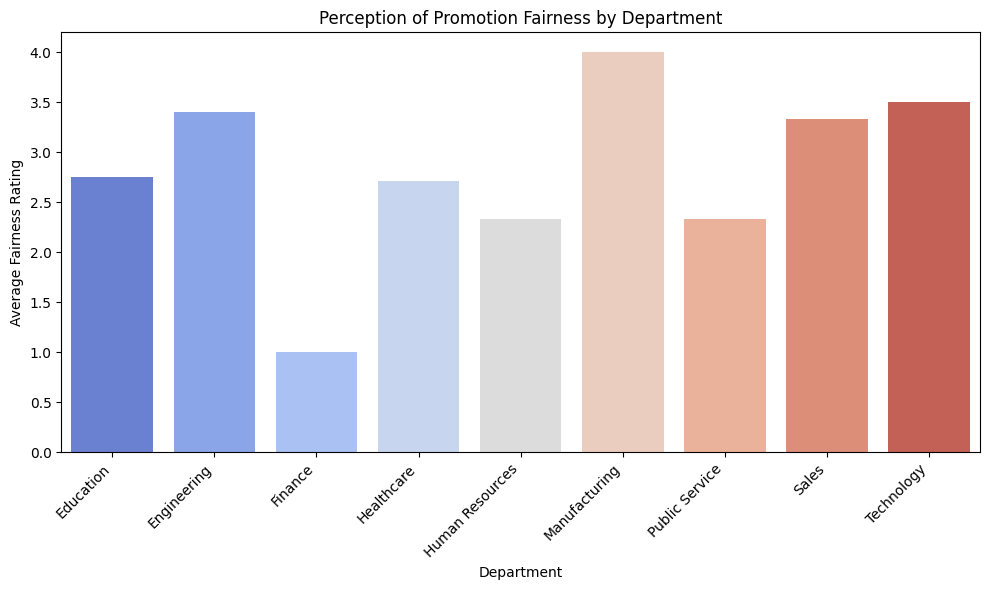

In [5]:

promotion_fairness_by_department = df.groupby('department')['promotion_transparency'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=promotion_fairness_by_department.index, y=promotion_fairness_by_department.values, palette='coolwarm')
plt.title('Perception of Promotion Fairness by Department')
plt.xlabel('Department')
plt.ylabel('Average Fairness Rating')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Question 2: Relationship between tenure and fairness in workload distribution

<ipython-input-13-2d585dcf4043>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tenure', y='workload_distribution_fairness', data=df, palette='Set2')


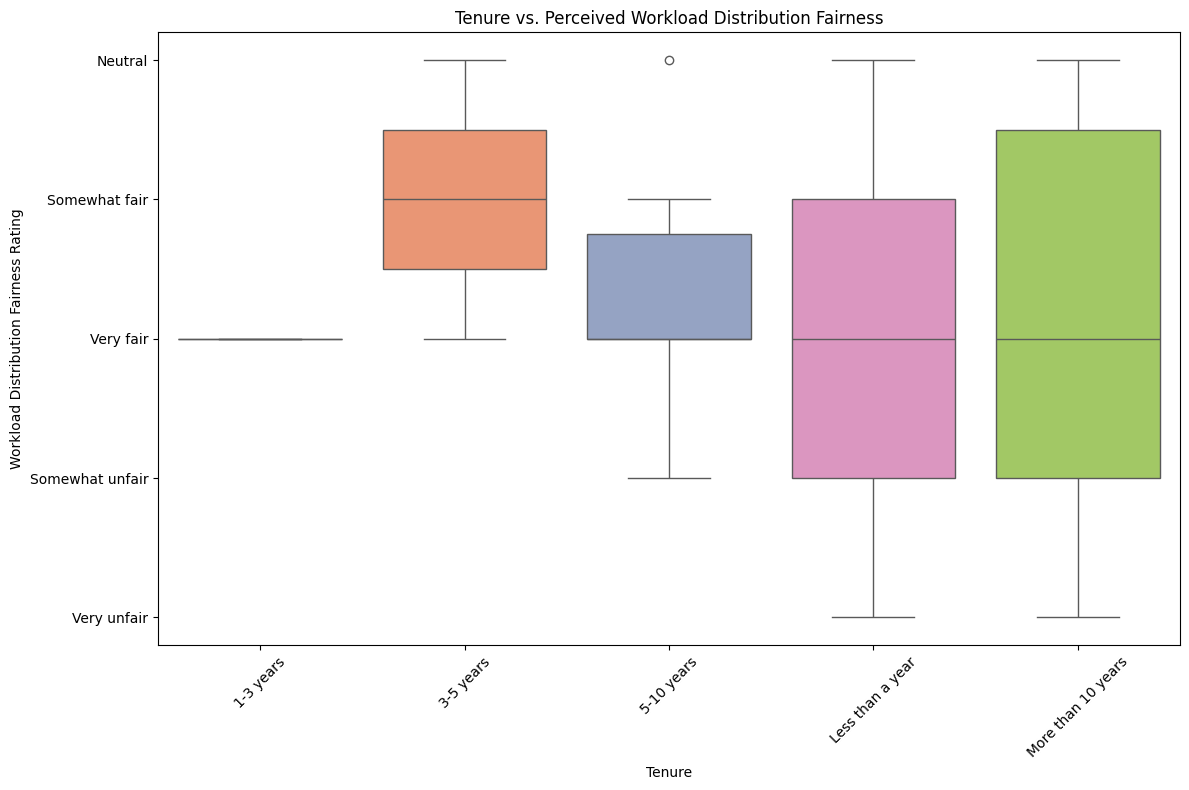

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='tenure', y='workload_distribution_fairness', data=df, palette='Set2')
plt.title('Tenure vs. Perceived Workload Distribution Fairness')
plt.xlabel('Tenure')
plt.ylabel('Workload Distribution Fairness Rating')
plt.xticks(rotation=45)  # This might help if tenure categories are many or labels are long
plt.tight_layout()
plt.show()

# Question 3 : Fairness Perception by Gender and Age Group

<ipython-input-11-fb889291a22e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender_identity', y='overall_fairness_satisfaction', data=df, ax=axs[0], palette='Pastel1')
<ipython-input-11-fb889291a22e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_range', y='overall_fairness_satisfaction', data=df, ax=axs[1], palette='Pastel2')


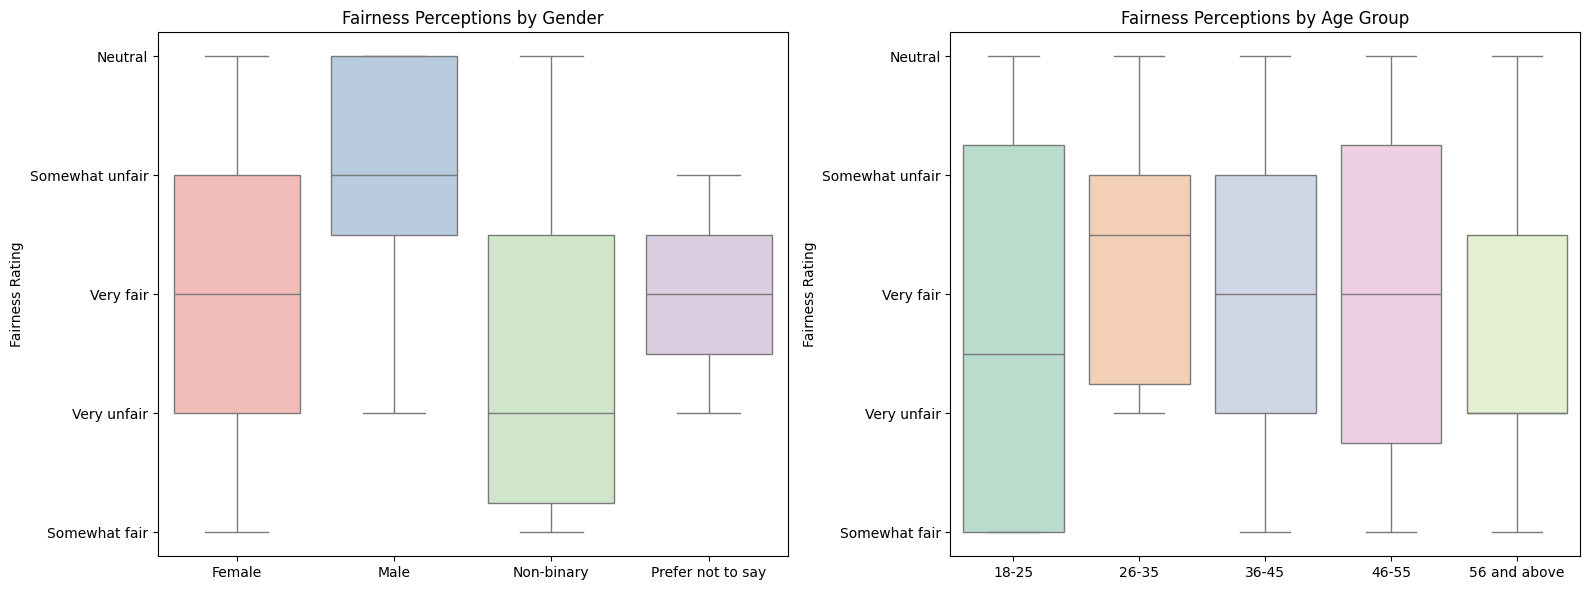

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='gender_identity', y='overall_fairness_satisfaction', data=df, ax=axs[0], palette='Pastel1')
sns.boxplot(x='age_range', y='overall_fairness_satisfaction', data=df, ax=axs[1], palette='Pastel2')
axs[0].set_title('Fairness Perceptions by Gender')
axs[1].set_title('Fairness Perceptions by Age Group')
for ax in axs:
    ax.set_ylabel('Fairness Rating')
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

# Question : Fairness in conflict resolution

In [15]:
df['conflict_resolution_fairness']

0                    Somewhat ineffectively
1                      Somewhat effectively
2                          Very effectively
3                        Very ineffectively
4     Neither effectively nor ineffectively
5                          Very effectively
6                          Very effectively
7                        Very ineffectively
8                        Very ineffectively
9                          Very effectively
10                         Very effectively
11                   Somewhat ineffectively
12                     Somewhat effectively
13                     Somewhat effectively
14    Neither effectively nor ineffectively
15                     Somewhat effectively
16                       Very ineffectively
17                   Somewhat ineffectively
18                       Very ineffectively
19                         Very effectively
20                     Somewhat effectively
21                   Somewhat ineffectively
22                       Very in

In [17]:
# Convert 'conflict_resolution_fairness' from categorical descriptions to an integer scale for analysis

# Define a mapping from textual descriptions to integers
fairness_mapping = {
    'Very ineffectively': 1,
    'Somewhat ineffectively': 2,
    'Neither effectively nor ineffectively': 3,
    'Somewhat effectively': 4,
    'Very effectively': 5
}

# Apply the mapping to convert the 'conflict_resolution_fairness' column
df['conflict_resolution_fairness'] = df['conflict_resolution_fairness'].map(fairness_mapping)

# Check the conversion
df['conflict_resolution_fairness'].head()

0    2
1    4
2    5
3    1
4    3
Name: conflict_resolution_fairness, dtype: int64

In [18]:
df['conflict_resolution_fairness'].corr(df['organizational_culture_rating'])

-0.1977246130971923

<ipython-input-21-c3543a663848>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='conflict_resolution_fairness', y='organizational_culture_rating', data=grouped_data, palette='Blues_d')


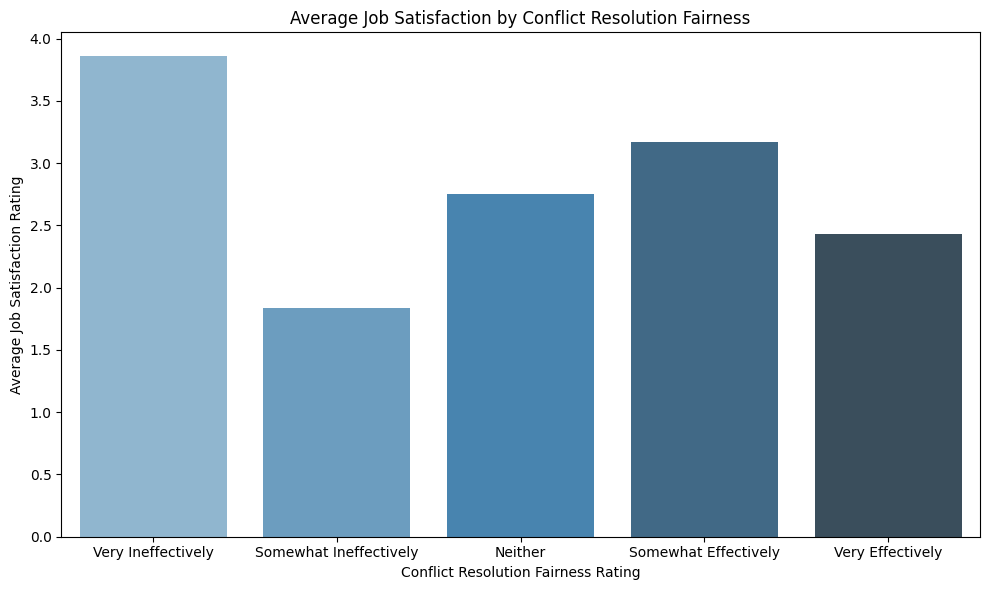

In [21]:
# First, you might want to group your data by 'conflict_resolution_fairness' and calculate the mean 'organizational_culture_rating'
grouped_data = df.groupby('conflict_resolution_fairness')['organizational_culture_rating'].mean().reset_index()

# Now, create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='conflict_resolution_fairness', y='organizational_culture_rating', data=grouped_data, palette='Blues_d')
plt.title('Average Job Satisfaction by Conflict Resolution Fairness')
plt.xlabel('Conflict Resolution Fairness Rating')
plt.ylabel('Average Job Satisfaction Rating')
plt.xticks(ticks=range(len(grouped_data['conflict_resolution_fairness'])), labels=['Very Ineffectively', 'Somewhat Ineffectively', 'Neither', 'Somewhat Effectively', 'Very Effectively'])
plt.tight_layout()
plt.show()

# Question : Fairness Perceptions vs. Organizational Culture Rating

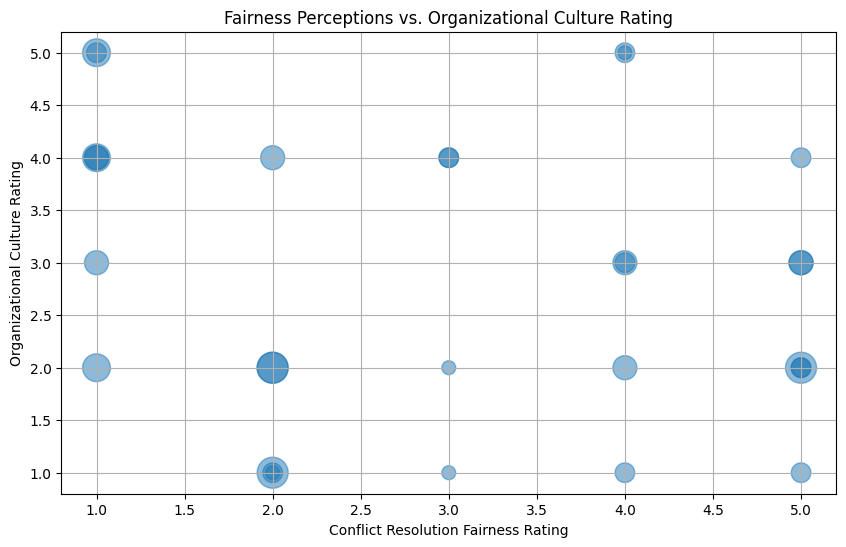

In [24]:
# Normalize or adjust the 'recommendation_likelihood' for bubble size
df['bubble_size'] = df['recommendation_likelihood'] * 100  # Adjust this scaling as needed

plt.figure(figsize=(10, 6))
plt.scatter(
    x='conflict_resolution_fairness',
    y='organizational_culture_rating',
    s='bubble_size',  # This controls the bubble size
    alpha=0.5,
    data=df
)

plt.title('Fairness Perceptions vs. Organizational Culture Rating')
plt.xlabel('Conflict Resolution Fairness Rating')
plt.ylabel('Organizational Culture Rating')
plt.grid(True)  # Adds a grid for easier reading
plt.show()

# Question : What themes emerge from semi-structured interviews regarding organizational fairness?

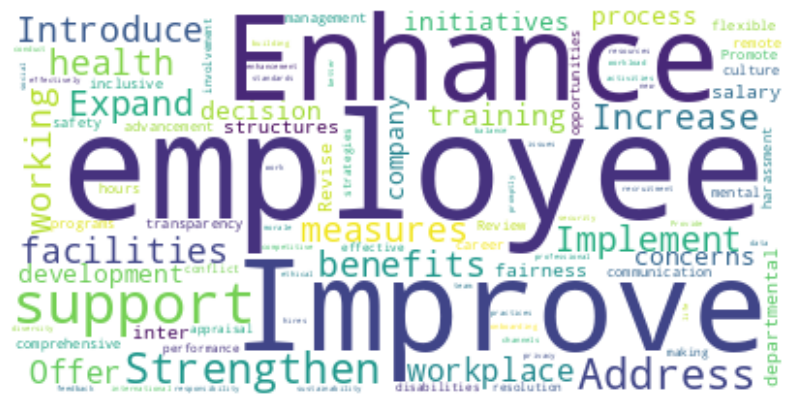

In [26]:
# Combine all comments into a single string
comments_combined = ' '.join(comment for comment in df['additional_comments'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(comments_combined)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()

# Question : Performance Categories by Unified Fairness Score

In [28]:
df['workload_distribution_fairness']

0             Neutral
1             Neutral
2       Somewhat fair
3             Neutral
4           Very fair
5           Very fair
6     Somewhat unfair
7             Neutral
8           Very fair
9             Neutral
10          Very fair
11          Very fair
12          Very fair
13          Very fair
14        Very unfair
15      Somewhat fair
16          Very fair
17        Very unfair
18      Somewhat fair
19    Somewhat unfair
20    Somewhat unfair
21    Somewhat unfair
22    Somewhat unfair
23          Very fair
24          Very fair
25        Very unfair
26      Somewhat fair
27            Neutral
28    Somewhat unfair
29      Somewhat fair
Name: workload_distribution_fairness, dtype: object

In [29]:
fairness_mapping = {
    'Very unfair': 1,
    'Somewhat unfair': 2,
    'Neutral': 3,
    'Somewhat fair': 4,
    'Very fair': 5
}
df['workload_distribution_fairness'] = df['workload_distribution_fairness'].map(fairness_mapping)

In [30]:
df['conflict_resolution_fairness'] = df['conflict_resolution_fairness'].map(fairness_mapping)  # If not already done
df['unified_fairness_score'] = df[['workload_distribution_fairness', 'conflict_resolution_fairness']].mean(axis=1)

In [31]:
df['performance_category'] = pd.cut(df['organizational_culture_rating'], bins=[0, 2, 3, 5], labels=['Low', 'Medium', 'High'])

In [32]:
grouped_data = df.groupby(['unified_fairness_score', 'performance_category']).size().unstack().fillna(0)

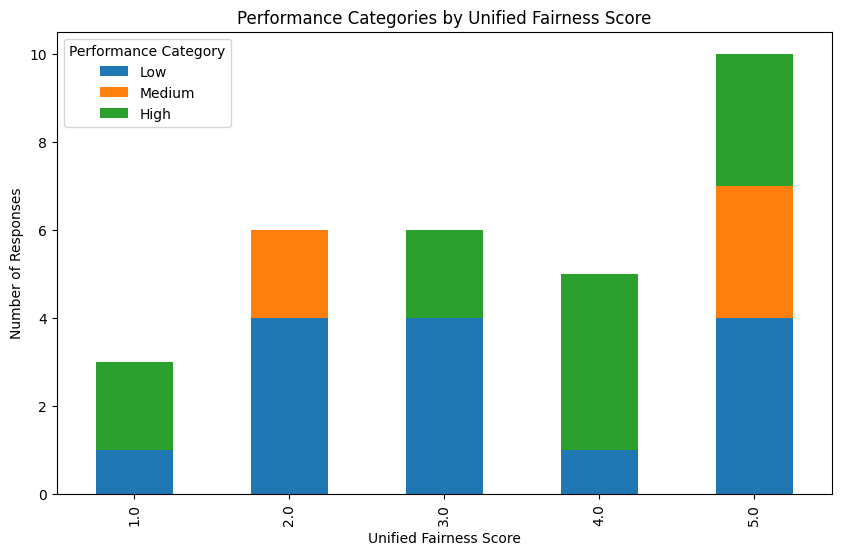

In [33]:
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Performance Categories by Unified Fairness Score')
plt.xlabel('Unified Fairness Score')
plt.ylabel('Number of Responses')
plt.legend(title='Performance Category')
plt.show()

#Question : Sentiment Analysis

In [45]:
from textblob import TextBlob
df['sentiment'] = df['additional_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [46]:
df['sentiment']

0     0.000000
1     0.000000
2    -0.100000
3     0.500000
4     0.500000
5    -0.100000
6     0.000000
7     0.000000
8     0.500000
9     0.000000
10    0.000000
11    0.500000
12    0.000000
13    0.000000
14    0.000000
15    0.550000
16    0.000000
17    0.250000
18    0.000000
19    0.000000
20    0.000000
21    0.500000
22    0.000000
23    0.000000
24    0.000000
25    0.266667
26    0.200000
27    0.100000
28    0.136364
29    0.550000
Name: sentiment, dtype: float64

In [47]:
df['sentiment_class'] = pd.cut(df['sentiment'],
       3, labels=["Positive", "Neutral", "Negative"])

In [49]:
# Group by 'department' and 'sentiment_class', then count the occurrences
grouped_counts = df.groupby(['department', 'sentiment_class']).size().unstack(fill_value=0)

# To calculate proportions, divide each count by the total counts per department
grouped_proportions = grouped_counts.div(grouped_counts.sum(axis=1), axis=0)

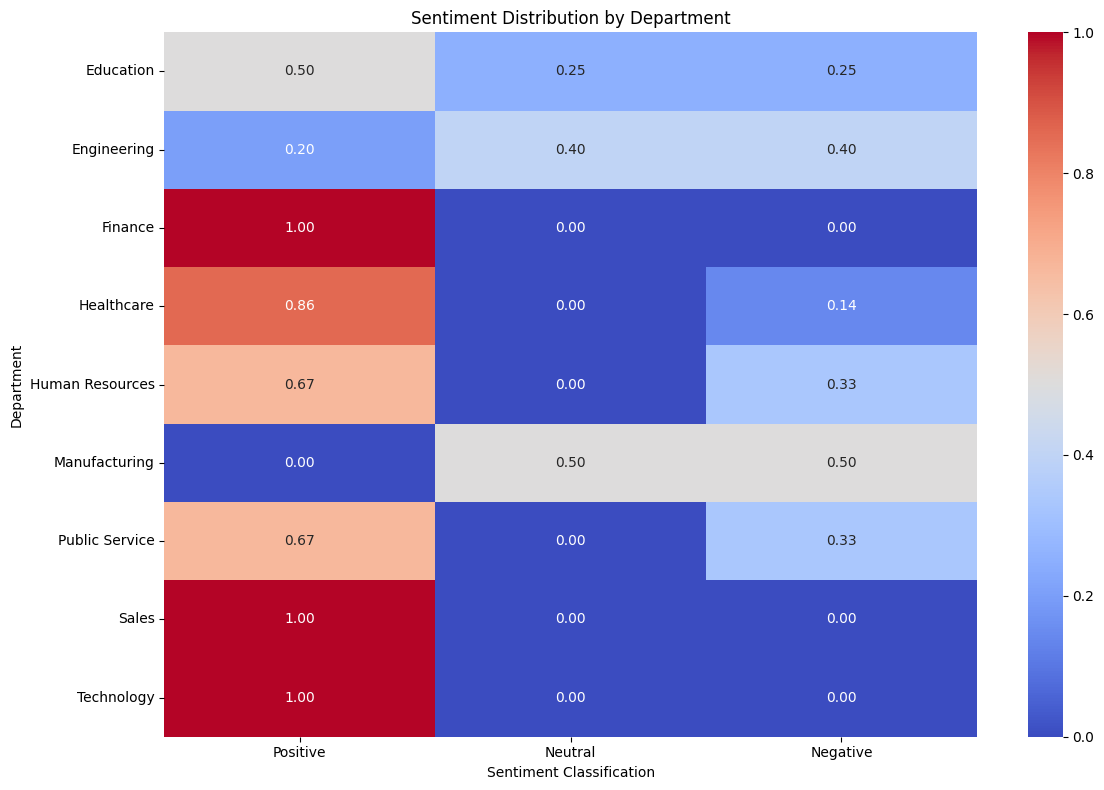

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_proportions, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sentiment Distribution by Department')
plt.ylabel('Department')
plt.xlabel('Sentiment Classification')
plt.tight_layout()
plt.show()